<a href="https://www.kaggle.com/code/raniaaboussaoun/fork-of-satellite-image-classification?scriptVersionId=193171283" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import io
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
import seaborn

from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_dir = '../input/satellite-image-classification/data'
labels = os.listdir(data_dir)
labels

['cloudy', 'desert', 'green_area', 'water']

In [3]:
for label in labels:
    print(label, len(os.listdir(data_dir+'/'+label)))

cloudy 1500
desert 1131
green_area 1500
water 1500


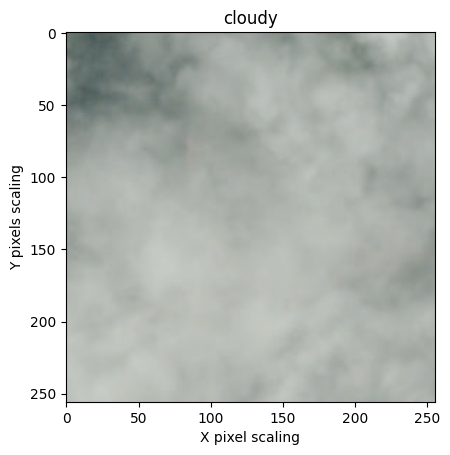

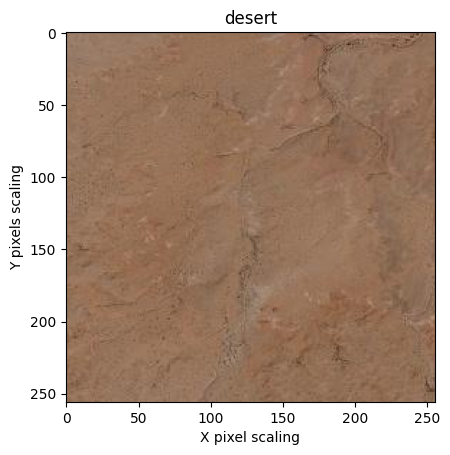

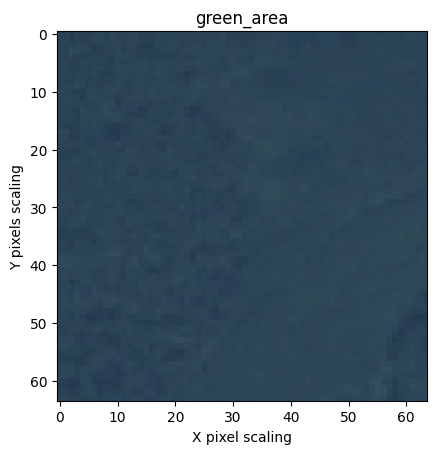

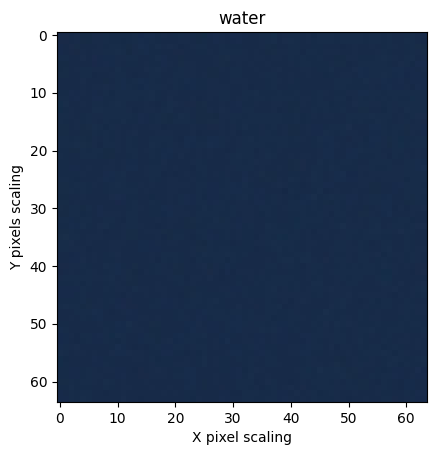

In [4]:
for label in labels:
    path = os.listdir(data_dir + '/' + label)
    img = data_dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

Create a data generator for test and training sets with a range of data augmentation options. Rescale the images.Split the data into an 80/20 split training and test sets.

In [5]:
# create a data generator for image augmentation
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        rescale=1./255,#scale images
        validation_split=0.2) #split data



In [6]:
#training set from folders
train_data=datagen.flow_from_directory(data_dir,
                                       target_size=(64,64),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


Found 4505 images belonging to 4 classes.


In [7]:

#create test set
test_data=datagen.flow_from_directory(data_dir,
                                       target_size=(64,64),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 1126 images belonging to 4 classes.


In [8]:
import numpy as np

Found 5631 images belonging to 4 classes.


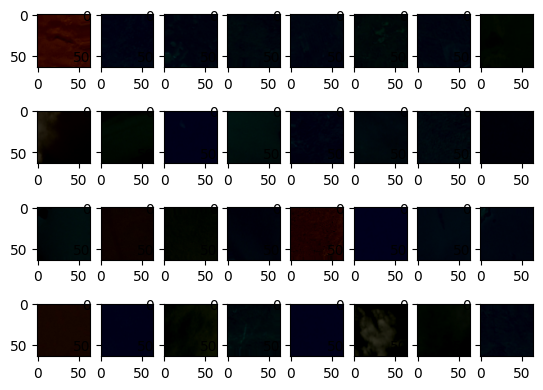

In [9]:
#sample images
img_iter = datagen.flow_from_directory(data_dir,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [10]:

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(64,64, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

- early stopping callback that will stop if the validation loss doesnt change after 3 epochs.


In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)



In [13]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=20, 
                    callbacks=[callback])

Epoch 1/20


2024-08-19 09:54:34.912061: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


141/141 [==============================] - 40s 229ms/step - loss: 1.0273 - accuracy: 0.7718 - val_loss: 2.9130 - val_accuracy: 0.2647
Epoch 2/20
141/141 [==============================] - 21s 152ms/step - loss: 0.4474 - accuracy: 0.8786 - val_loss: 3.1254 - val_accuracy: 0.5142
Epoch 3/20
141/141 [==============================] - 21s 150ms/step - loss: 0.3645 - accuracy: 0.9128 - val_loss: 1.5029 - val_accuracy: 0.6110
Epoch 4/20
141/141 [==============================] - 22s 154ms/step - loss: 0.3272 - accuracy: 0.9152 - val_loss: 0.5745 - val_accuracy: 0.7300
Epoch 5/20
141/141 [==============================] - 22s 156ms/step - loss: 0.2223 - accuracy: 0.9378 - val_loss: 0.8448 - val_accuracy: 0.7869
Epoch 6/20
141/141 [==============================] - 21s 150ms/step - loss: 0.2701 - accuracy: 0.9374 - val_loss: 0.1760 - val_accuracy: 0.9183
Epoch 7/20
141/141 [==============================] - 26s 185ms/step - loss: 0.2013 - accuracy: 0.9463 - val_loss: 0.0872 - val_accuracy: 0.9

checking the keys in th dict output from model fit

In [14]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


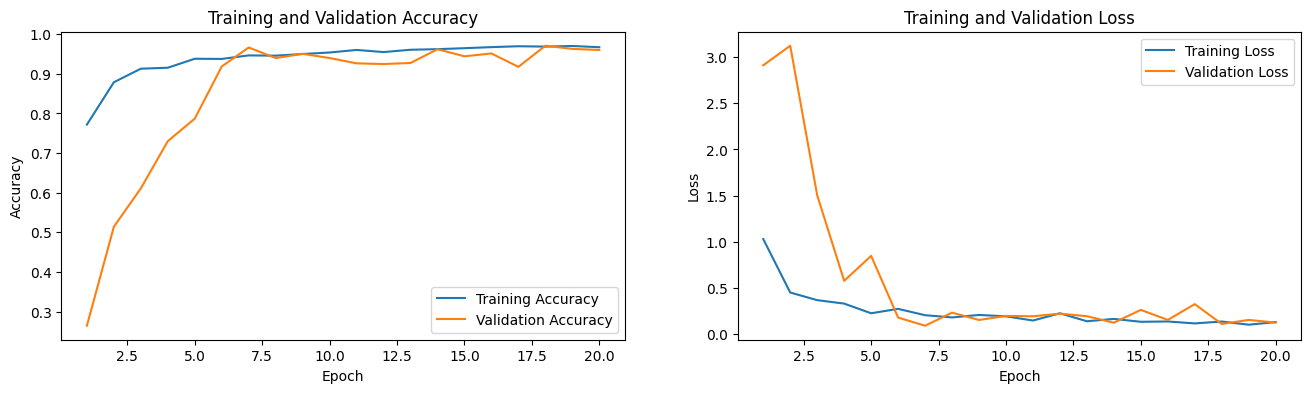

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

evulate the test data

In [16]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1126/1126 [==============================] - 5s 4ms/step - loss: 0.1153 - accuracy: 0.9618
Test loss: 0.11525192111730576
Test accuracy: 0.9618117213249207


a prediction to test out my model

In [17]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

1126/1126 [==============================] - 4s 4ms/step


array([0, 0, 0, ..., 3, 3, 3])

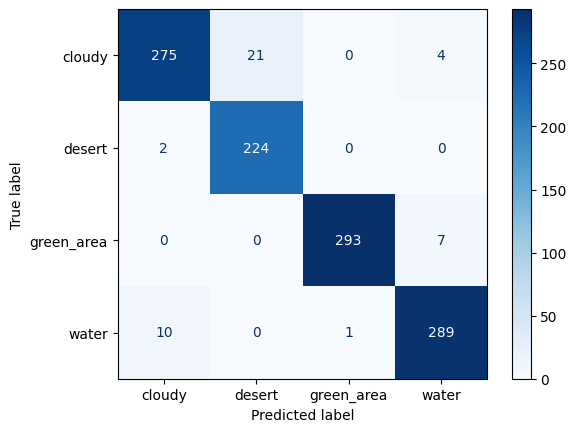

In [18]:
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.show();

In [19]:
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       300
           1       0.91      0.99      0.95       226
           2       1.00      0.98      0.99       300
           3       0.96      0.96      0.96       300

    accuracy                           0.96      1126
   macro avg       0.96      0.96      0.96      1126
weighted avg       0.96      0.96      0.96      1126



Recall = True Positives / (True Positives + False Negatives)
F1-score = 2 * (Precision * Recall) / (Precision + Recall)
-A model with high precision may have low recall 